Actividad 5: Uso de software para búsqueda.
Zalvador Mendoza Vélez 2109163  N4

In [3]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [11]:
mnist = keras.datasets.mnist

In [16]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [17]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

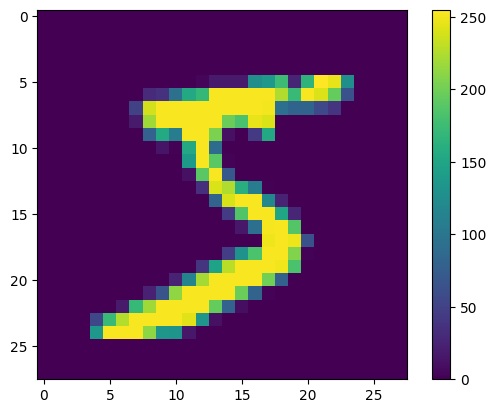

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

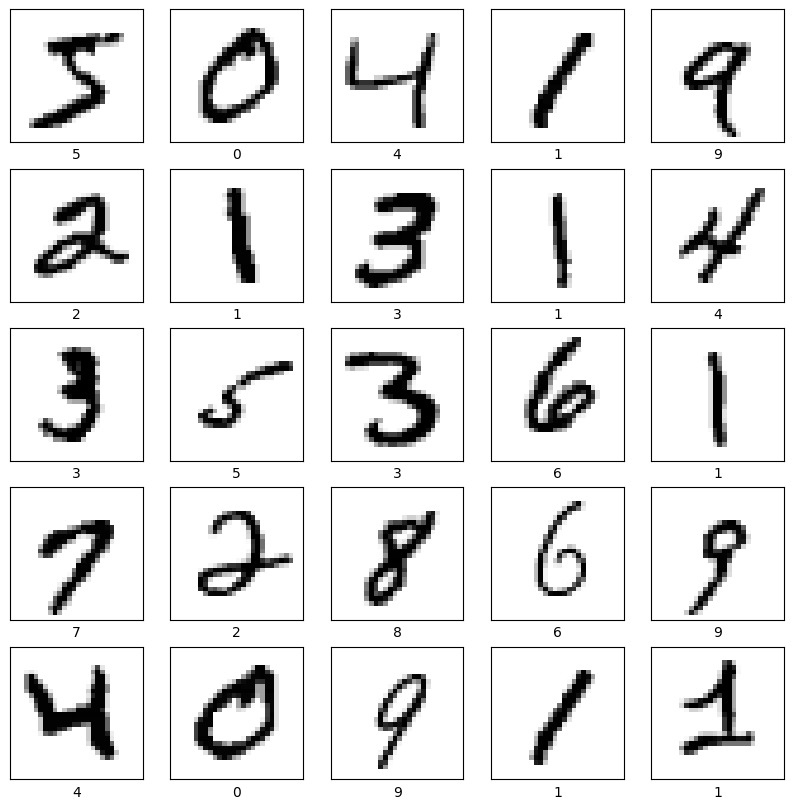

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2606 - accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1145 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0448 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0829 - accuracy: 0.9781 - 920ms/epoch - 3ms/step

Test accuracy: 0.9781000018119812


In [30]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [31]:
predictions[0]

array([2.5385676e-08, 1.7772367e-11, 1.0110483e-08, 1.1685556e-05,
       1.1236358e-14, 1.0610103e-10, 4.0011759e-16, 9.9998826e-01,
       1.7218959e-08, 1.8688651e-08], dtype=float32)

In [32]:
np.argmax(predictions[0])

7

In [33]:
test_labels[0]

7

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

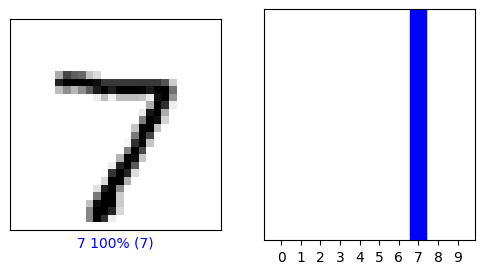

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

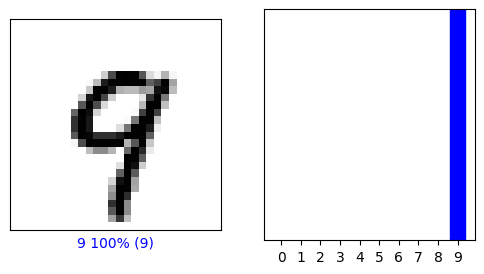

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

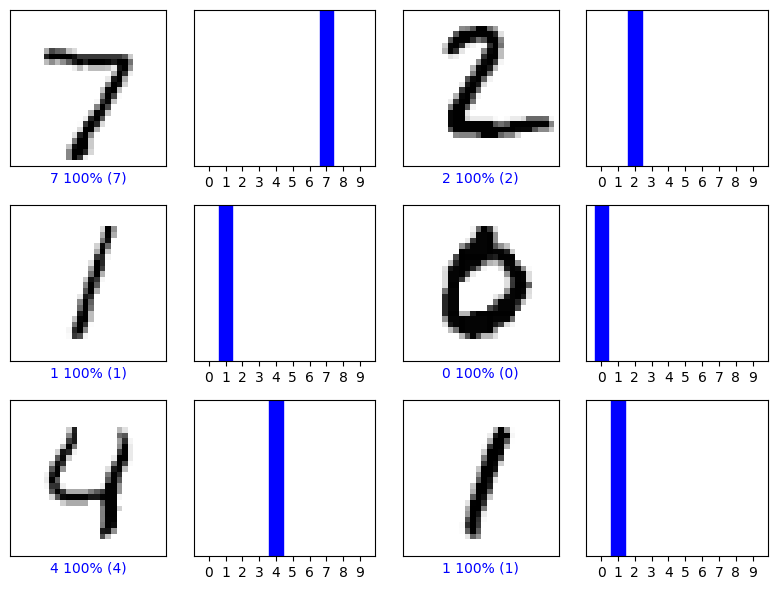

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()